In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing
import scipy.stats as stats
from statistics import mean,stdev
from statsmodels.graphics.gofplots import qqplot
import math

In [220]:

data =pd.read_csv('train.csv')
data.shape

(614, 13)

In [221]:
data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [222]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [223]:
data.loc[23:31,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N


In [224]:
data['Gender'].fillna('Unknown',inplace =True)
data['Married'].fillna('Unknown',inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)
data['Credit_History'].fillna(0.5,inplace = True)
data['LoanAmount'].fillna(data.LoanAmount.mean(),inplace = True)                  #data.LoanAmount.mean() = 128
data['Loan_Amount_Term'].fillna(360,inplace = True) 

In [225]:
data =data.drop('Loan_ID',axis =1)

In [226]:
data.loc[23:31,:]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,Unknown,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,0.5,Semiurban,N
25,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
26,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
27,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
28,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
29,Female,No,2,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,0.5,Urban,N
31,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N


In [227]:
replace_dict = {'Y':1, 'N':0}
data.Loan_Status = data.Loan_Status.replace(replace_dict)

In [228]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [229]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.814332,0.687296,7024.705081
std,6109.041673,2926.248369,84.037468,64.428629,0.362009,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,81000.000000


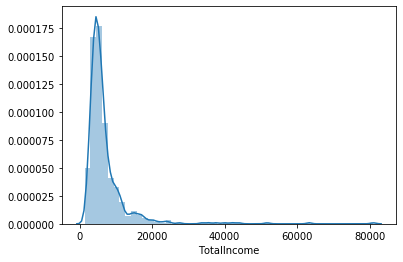

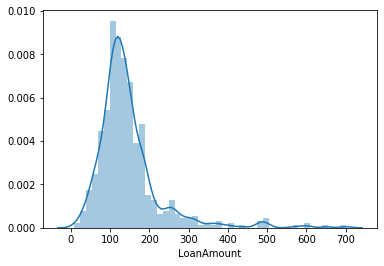

In [230]:
plt.figure(0)
sns.distplot(data.TotalIncome)
plt.figure(1)
sns.distplot(data.LoanAmount)
plt.show()

In [231]:
#data.LoanAmount = (data.LoanAmount - data.LoanAmount.min())/(data.LoanAmount.max() - data.LoanAmount.min())

In [232]:
#data.TotalIncome = (data.TotalIncome - data.TotalIncome.min())/(data.TotalIncome.max() - data.TotalIncome.min())

In [233]:
data.LoanAmount = preprocessing.scale(np.log(data.LoanAmount))

In [234]:
data['TotalIncome'] = preprocessing.scale(np.log(np.log(data.TotalIncome)))

In [235]:
data.TotalIncome.mean()

1.5808924925566358e-15

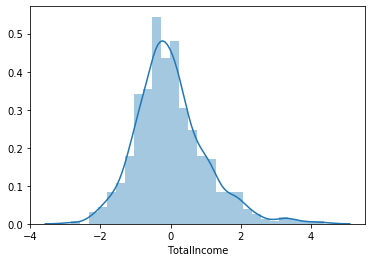

In [236]:

sns.distplot(data.TotalIncome) #kde = False, color = 'b', hist_kws={'alpha': 0.9})

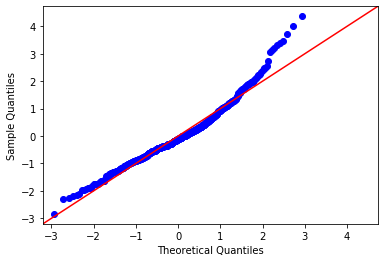

In [237]:
qqplot(data.TotalIncome,dist ='norm',line='45')
plt.show()

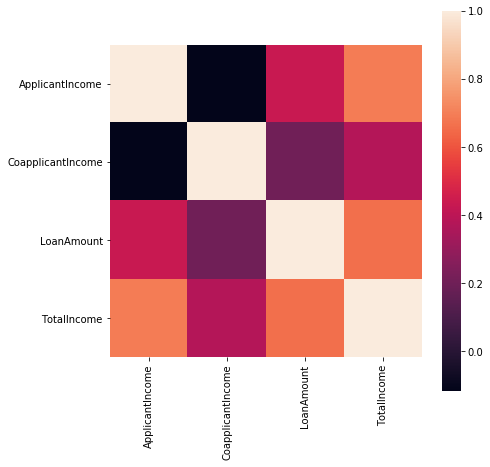

In [238]:
corr = data.select_dtypes(include = ['float64', 'int64']).loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

In [239]:
data.corr(method = 'pearson')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.434849,-0.046531,-0.005018,-0.004710,0.691849
CoapplicantIncome,-0.116605,1.000000,0.204179,-0.059383,-0.028594,-0.059187,0.379764
LoanAmount,0.434849,0.204179,1.000000,0.084616,-0.036029,-0.041874,0.662631
Loan_Amount_Term,-0.046531,-0.059383,0.084616,1.000000,-0.000924,-0.022549,-0.054548
Credit_History,-0.005018,-0.028594,-0.036029,-0.000924,1.000000,0.513319,0.016714
Loan_Status,-0.004710,-0.059187,-0.041874,-0.022549,0.513319,1.000000,0.012783
TotalIncome,0.691849,0.379764,0.662631,-0.054548,0.016714,0.012783,1.000000


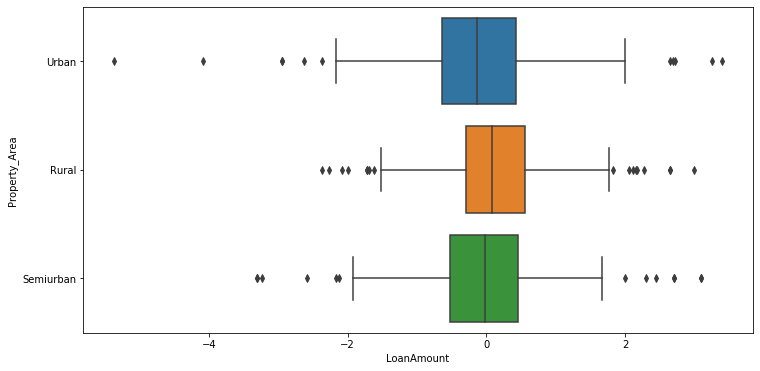

In [256]:

plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Property_Area', x = 'LoanAmount',  data = data, orient = 'h')

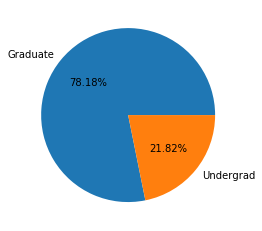

In [241]:
plt.pie(data.Education.value_counts(),labels=['Graduate','Undergrad'],autopct='%1.2f%%')
#plt.xlabel('Education')
plt.show()

In [242]:
gb = data.groupby(by=["Education", "Loan_Status"])
gbs = gb.size()
gbs

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
dtype: int64

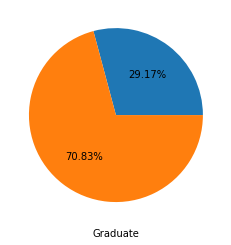

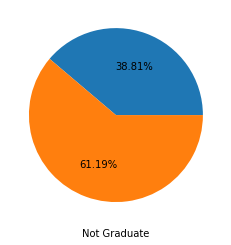

In [243]:
plt.figure(0)
plt.pie([gbs[0],gbs[1]],autopct='%1.2f%%')
plt.xlabel('Graduate')
plt.figure(1)
plt.pie([gbs[2],gbs[3]],autopct='%1.2f%%')
plt.xlabel('Not Graduate')

plt.show()

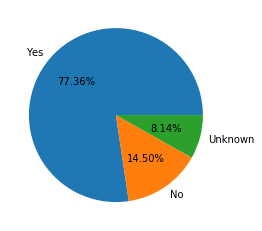

In [244]:
plt.pie(data.Credit_History.value_counts(),labels=['Yes','No','Unknown'],autopct='%1.2f%%')
#plt.xlabel('Credit History')
plt.show()

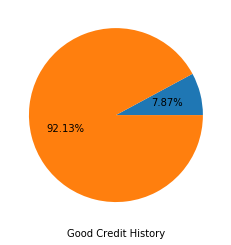

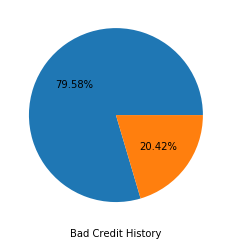

In [254]:
gb = data.groupby(by=["Credit_History", "Loan_Status"])
gbs = gb.size().tolist()

plt.figure(0)
plt.pie([gbs[1],gbs[0]],autopct='%1.2f%%')
plt.xlabel('Good Credit History')
plt.figure(1)
plt.pie([gbs[5],gbs[4]],autopct='%1.2f%%')
plt.xlabel('Bad Credit History')

plt.show()

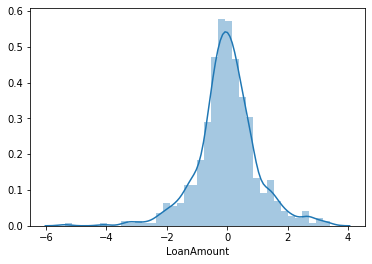

In [246]:
sns.distplot(data.LoanAmount)

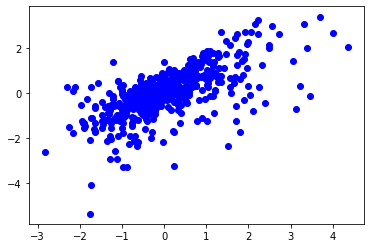

In [247]:
plt.scatter(data.TotalIncome,data.LoanAmount,color ='b')

In [248]:
def estimate_coef(x, y): 
    n = np.size(x) 
  
    m_x, m_y = np.mean(x), np.mean(y) 
  
    numa = np.sum(y*x) - n*m_y*m_x 
    numb = np.sum(x*x) - n*m_x*m_x 
  
    b_1 = numa / numb 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "b", 
               marker = "o", s = 30) 
  
    y_pred = b[0] + b[1]*x 
  
    plt.plot(x, y_pred, color = "r") 
    plt.xlabel('Total Income') 
    plt.ylabel('Loan Amount') 
  
    plt.show() 

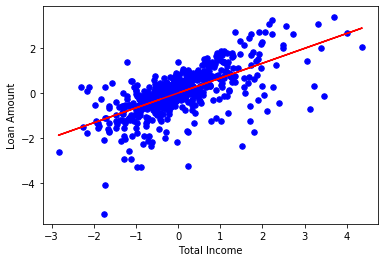

(-7.591214173554817e-16, 0.6626313083498345)

In [249]:
b = estimate_coef(data.TotalIncome,data.LoanAmount)

plot_regression_line(data.TotalIncome,data.LoanAmount,b)
b

In [250]:
from scipy.stats import pearsonr
data1 = data.Loan_Status
data2 = data.LoanAmount
stat, p = pearsonr(data1, data2)
print('stat=',stat,', p=',p)
if p > 0.05:
    print('Failed to reject H0')
else:
    print('Reject H0')

stat= -0.04187358290777825 , p= 0.3002364101035521
Failed to reject H0


In [251]:
from scipy.stats import pearsonr
data1 = data.CoapplicantIncome
data2 = data.LoanAmount
stat, p = pearsonr(data1, data2)
print('stat=',stat,', p=',p)
if p > 0.05:
    print('Failed to reject H0')
else:
    print('Reject H0')

stat= 0.20417874816300638 , p= 3.3450057734449784e-07
Reject H0


In [252]:
data.Credit_History.value_counts()

1.0    475
0.0     89
0.5     50
Name: Credit_History, dtype: int64

In [253]:
from scipy.stats import pearsonr
data1 = data.Credit_History
data2 = data.Loan_Status
stat, p = pearsonr(data1, data2)
print('stat=',stat,', p=',p)
if p > 0.05:
    print('Failed to reject H0')
else:
    print('Reject H0')

stat= 0.5133194232478169 , p= 1.4173527081623127e-42
Reject H0
